# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
# Get Weather Data 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Pretty print JSON 
weather_response_json = requests.get(query_url + city).json()
print(json.dumps(weather_response_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 4.9333,
        "lon": -52.3333
    },
    "dt": 1645069547,
    "id": 3382160,
    "main": {
        "feels_like": 26.16,
        "humidity": 84,
        "pressure": 1013,
        "temp": 26.16,
        "temp_max": 26.16,
        "temp_min": 24.02
    },
    "name": "Cayenne",
    "sys": {
        "country": "GF",
        "id": 2038747,
        "sunrise": 1645091056,
        "sunset": 1645134162,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.54
    }
}


In [6]:
print(requests.get(query_url+city))

<Response [200]>


In [7]:
# Day 2 - 06-Python-APIs 
# Day 2 - 10-Stu_API_Exceptions/Solved/api_exceptions.ipynb

# Set up lists to hold response info
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Start processing record at 1
index = 1

# Print beginning statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through each city
for city in cities:
    
    # Search Query 
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        process_record = response["name"]
        print(f"Processing Record {index} | {process_record}")
        
        index = index + 1
    
    except:
        print(f"City not found. Skipping...")
    pass
    

#Print end statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mirny
Processing Record 2 | Geraldton
Processing Record 3 | Cabo San Lucas
Processing Record 4 | Cayenne
Processing Record 5 | Nang Rong
Processing Record 6 | New Norfolk
Processing Record 7 | Seddon
Processing Record 8 | Punta Arenas
Processing Record 9 | Ushuaia
Processing Record 10 | Tena
Processing Record 11 | Inírida
Processing Record 12 | Salalah
Processing Record 13 | Tonekābon
Processing Record 14 | Flinders
City not found. Skipping...
City not found. Skipping...
Processing Record 15 | Yellowknife
Processing Record 16 | Jalu
Processing Record 17 | Mar del Plata
Processing Record 18 | Nikolskoye
Processing Record 19 | Hobart
Processing Record 20 | Saskylakh
Processing Record 21 | Faya
Processing Record 22 | Celestún
Processing Record 23 | Atuona
Processing Record 24 | Kavieng
City not found. Skipping...
Processing Record 25 | Winsum
Processing Record 26 | Avarua
Processing Record 27 | Santa Cruz de la

Processing Record 224 | Iqaluit
Processing Record 225 | Ixtapa
Processing Record 226 | Kalamb
Processing Record 227 | Arman'
Processing Record 228 | Husavik
Processing Record 229 | Singaparna
Processing Record 230 | Marystown
Processing Record 231 | Beringovskiy
Processing Record 232 | Ambilobe
Processing Record 233 | Ust'-Karsk
Processing Record 234 | Narsaq
Processing Record 235 | Hamilton
Processing Record 236 | Oranjestad
Processing Record 237 | San Patricio
City not found. Skipping...
Processing Record 238 | Bubaque
Processing Record 239 | Dunedin
Processing Record 240 | Bathsheba
Processing Record 241 | Sawtell
Processing Record 242 | Mount Gambier
Processing Record 243 | Anadyr
Processing Record 244 | Port Elizabeth
Processing Record 245 | Ayr
Processing Record 246 | Padang
Processing Record 247 | Melito di Porto Salvo
Processing Record 248 | Gawler
Processing Record 249 | Mongoumba
Processing Record 250 | Barrow
Processing Record 251 | Sapucaia
Processing Record 252 | Pangai
Pr

Processing Record 455 | Dali
Processing Record 456 | Kudahuvadhoo
Processing Record 457 | Laramie
Processing Record 458 | Manadhoo
City not found. Skipping...
Processing Record 459 | Rūdbār
Processing Record 460 | Yaan
Processing Record 461 | Berdigestyakh
Processing Record 462 | Santa Vitória do Palmar
Processing Record 463 | Miquelon
Processing Record 464 | Sarangani
Processing Record 465 | Stornoway
Processing Record 466 | Vytegra
Processing Record 467 | Robe
Processing Record 468 | El Carmen
City not found. Skipping...
Processing Record 469 | Woodward
Processing Record 470 | Broome
Processing Record 471 | Moen
Processing Record 472 | Manaure
Processing Record 473 | Poronaysk
Processing Record 474 | Isangel
Processing Record 475 | La Ciotat
City not found. Skipping...
Processing Record 476 | Nhulunbuy
Processing Record 477 | Palmer
Processing Record 478 | Byron Bay
Processing Record 479 | Tignère
Processing Record 480 | Yanam
Processing Record 481 | Santa Inês
Processing Record 482 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Reference: https://www.kite.com/python/answers/how-to-set-the-index-title-of-a-pandas-dataframe-in-python

# Place all of the data found into a summary DataFrame
city_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, 
                   "Wind Speed": wind_speed, "Country": country, "Date": date})
index = city_df.index
index.name = "City_ID"
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Mirny,62.5353,113.9611,-26.50,97,100,1.09,RU,1645069569
1,Geraldton,-28.7667,114.6000,40.23,10,0,10.29,AU,1645069569
2,Cabo San Lucas,22.8909,-109.9124,21.61,63,33,5.65,MX,1645069319
3,Cayenne,4.9333,-52.3333,26.16,84,75,1.54,GF,1645069547
4,Nang Rong,14.6377,102.7914,28.20,62,60,3.24,TH,1645069570


In [20]:
# Export file as a CSV, with index, and with the header
city_df.to_csv("../WeatherPy/cities.csv", index=True, header=True)

In [40]:
# Display a statistical overview of the DataFrame
stats = city_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,18.451022,17.652165,11.341033,73.298913,57.940217,3.837482,1.645070e+09
std,33.518844,88.805725,17.076444,20.053363,39.274432,2.697578,2.792517e+02
min,-54.800000,-175.200000,-35.870000,10.000000,0.000000,0.000000,1.645069e+09
25%,-9.639575,-58.931775,0.885000,64.000000,19.000000,1.822500,1.645070e+09
50%,20.608450,19.771350,17.170000,77.000000,70.500000,3.090000,1.645070e+09
75%,46.532525,90.226750,24.687500,89.000000,99.000000,5.462500,1.645070e+09
max,78.218600,179.316700,41.040000,100.000000,100.000000,18.850000,1.645071e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
# Get cities where humidity is less than 100
# cities_humidity_under_100 = city_df.loc[city_df["Humidity"] < 100]
# cities_humidity_under_100.head()

# Skipped since there are no cities that have humidity > 100%

In [38]:
# Get the indices of cities that have humidity over 100%.
# cities_humidity_over_100 = city_df.loc[city_df["Humidity"] > 100].index
# cities_humidity_over_100

# Skipped since there are no cities that have humidity > 100%

Int64Index([], dtype='int64', name='City_ID')

In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# clean_city_data = city_df.drop(cities_humidity_over_100, inplace = False)
# clean_city_data.head()

# Skipped since there are no cities that have humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

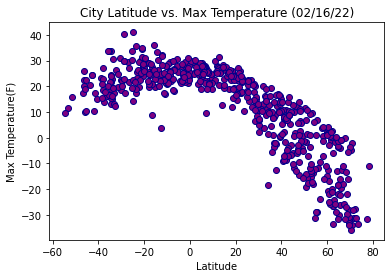

In [63]:
# Plot out latitude versus max temperature
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolors="purple", marker="o", edgecolor="darkblue")

# Add labels
plt.title("City Latitude vs. Max Temperature (02/16/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# Save Figure
plt.savefig("Charts/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

The code is analyzing the correlation between latitude and max temperature.

## Latitude vs. Humidity Plot

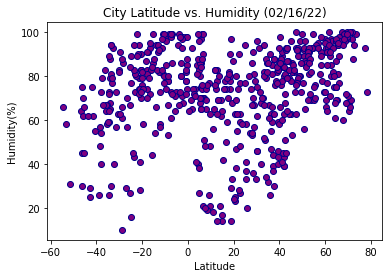

In [64]:
# Plot out latitude versus humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], facecolors="purple", marker="o", edgecolor="darkblue")

# Add labels
plt.title("City Latitude vs. Humidity (02/16/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save Figure
plt.savefig("Charts/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

The code is analyzing the correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

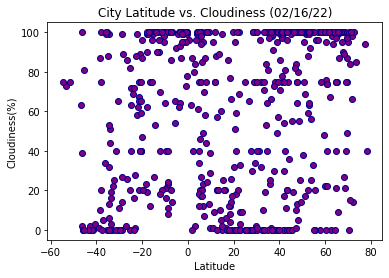

In [65]:
# Plot out latitude versus cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolors="purple", marker="o", edgecolors="darkblue")

# Add labels
plt.title("City Latitude vs. Cloudiness (02/16/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save Figure
plt.savefig("Charts/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

The code is analyzing the correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

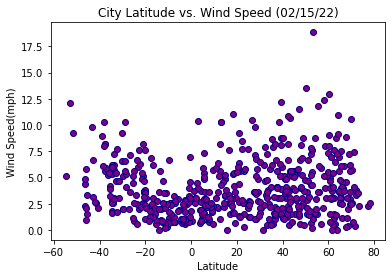

In [66]:
# Plot out latitude versus cloudiness
plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolors="purple", marker="o", edgecolors="darkblue")

# Add labels
plt.title("City Latitude vs. Wind Speed (02/15/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save Figure
plt.savefig("Charts/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

The code is analyzing the correlation between latitude and wind speed.

## Linear Regression

In [80]:
# Data for northern hemisphere (latitude)
north_hemi = city_df.loc[city_df["Lat"] >= 0.00]
north_hemi.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Mirny,62.5353,113.9611,-26.50,97,100,1.09,RU,1645069569
2,Cabo San Lucas,22.8909,-109.9124,21.61,63,33,5.65,MX,1645069319
3,Cayenne,4.9333,-52.3333,26.16,84,75,1.54,GF,1645069547


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

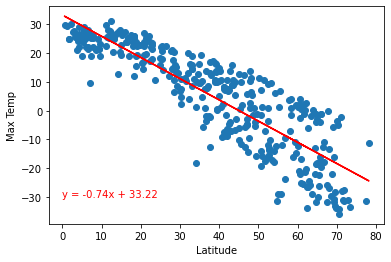

The r-value is: -0.8730243016224122


In [121]:
# Create plot - N. Hemisphere - Max Temp vs. Latitude Linear Regression
# Day 2 - 08 - Ins_Fits_and_Regression

#Add the linear regression equation and line to plot
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [82]:
# Dataframe for southern hemisphere (latitude)
south_hemi = city_df.loc[city_df["Lat"] < 0.00]
south_hemi.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Geraldton,-28.7667,114.6000,40.23,10,0,10.29,AU,1645069569
5,New Norfolk,-42.7826,147.0587,24.40,25,2,3.13,AU,1645069571
6,Seddon,-37.8068,144.8916,27.04,54,100,5.66,AU,1645069571


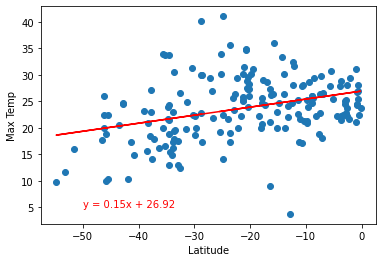

The r-value is: 0.34364651415113456


In [122]:
#Add the linear regression equation and line to plot
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

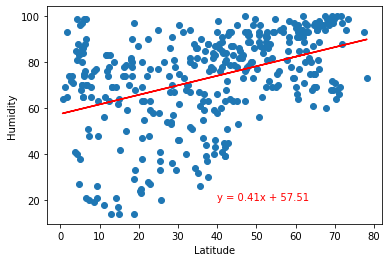

The r-value is: 0.4191348222318816


In [123]:
#Add the linear regression equation and line to plot
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

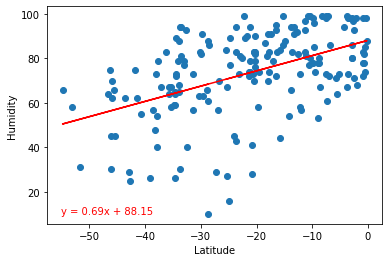

The r-value is: 0.4873856935913617


In [124]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

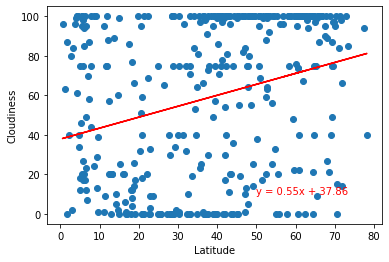

The r-value is: 0.2896310521568656


In [126]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

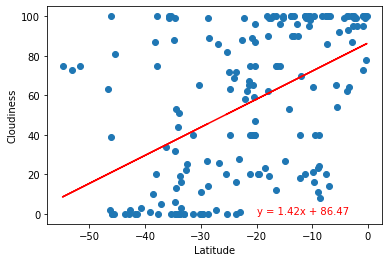

The r-value is: 0.4997746174967905


In [120]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

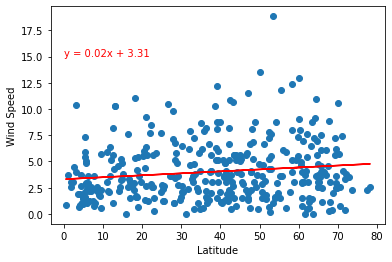

The r-value is: 0.13802681814700157


In [129]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

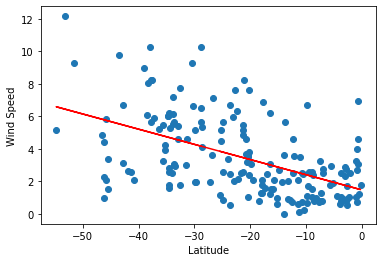

The r-value is: -0.5194806699950569


In [130]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

print(f"The r-value is: {rvalue}")